### **Introducción**

Este análisis exploratorio de datos se realizará sobre la base datos_290004, que corresponde a una estación meteorológica nacional de código 290004. Esta estación registra variables climáticas a lo largo del tiempo, lo cual permite estudiar patrones como la variación de temperatura, presión atmosférica, dirección y velocidad del viento, entre otros.

El EDA tiene como objetivo:

1. Comprender la estructura general de los datos
2. Evaluar la distribución de variables relevantes.
3. Identificar posibles inconsistencias o valores nulos.
4. Visualizar comportamientos temporales y estacionales.
5. Explorar relaciones entre variables que puedan alimentar futuros modelos.

Este estudio cumple un rol fundamental como paso previo a la construcción de un modelo SARIMAX, el cual se utiliza para predecir series temporales considerando el efecto de variables exógenas. Por ende, el EDA que realizaremos no solo busca caracterizar los datos, sino también identificar que variables podrían ser útiles en el modelamiento predictivo, asegurando que cumplan con los supuestos necesarios y aporten información significativa.


### **Variables**

| Variable         | Descripción                                                |
| ---------------- | ---------------------------------------------------------- |
| `momento`        | Fecha y hora del registro|
| `dd_Valor`       | Dirección del viento en grados (0–360°)|
| `ff_Valor`       | Velocidad del viento promedio (m/s)|
| `VRB_Valor`      | Indicador de dirección de viento indefinida (1: sí, 0: no)|
| `Presion_QFE`    | Presión atmosférica en superficie (hPa)|
| `Presion_QFF`    | Presión atmosférica reducida al nivel medio del mar (hPa)|
| `Temperatura`    | Temperatura del aire en grados Celsius (°C)|
| `Año`            | Año en que se realizó el registro|
| `Estacion`       | Código de la estación meteorológica|
| `CodigoNacional` | Código nacional del punto de observación|


In [4]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [5]:
uploaded = files.upload()

Saving datos_290004.xlsx to datos_290004.xlsx


In [6]:
#pasar la base de datos a un dataframe
df = pd.read_excel("datos_290004.xlsx")
#pasar la fecha y la hora al formato a datetime
df["momento"] = pd.to_datetime(df["momento"])
#ver primeros datos del dataframe
df.head()

,CodigoNacional,momento,dd_Valor,ff_Valor,VRB_Valor,Estacion,Año,Presion_QFE,Temperatura,Presion_QFF
0,290004,2021-01-01 00:00:00,262,9,0,290004,2021,997.582609,16.144755,1014.83913
1,290004,2021-01-01 01:00:00,295,5,0,290004,2021,995.000000,15.800000,1012.30000
2,290004,2021-01-01 02:00:00,52,1,0,290004,2021,995.700000,15.800000,1013.00000
3,290004,2021-01-01 03:00:00,95,2,0,290004,2021,996.100000,15.900000,1013.40000
4,290004,2021-01-01 04:00:00,280,8,0,290004,2021,996.600000,15.200000,1014.00000


In [7]:
print("Informacion general:")
print(df.info())

print("Resumen estadistico:")
print(df.describe())

print("Valores nulos existentes")
print(df.isnull().sum())

Informacion general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39731 entries, 0 to 39730
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CodigoNacional  39731 non-null  int64         
 1   momento         39731 non-null  datetime64[ns]
 2   dd_Valor        39731 non-null  int64         
 3   ff_Valor        39731 non-null  int64         
 4   VRB_Valor       39731 non-null  int64         
 5   Estacion        39731 non-null  int64         
 6   Año             39731 non-null  int64         
 7   Presion_QFE     39731 non-null  float64       
 8   Temperatura     39731 non-null  float64       
 9   Presion_QFF     39731 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 3.0 MB
None
Resumen estadistico:
       CodigoNacional                        momento      dd_Valor  \
count         39731.0                          39731  39731.000000   
mean       

Conclusiones

Con respecto a la información general, podemos decir que la base de datos posee 39.731 registros y 10 variables, todas estas variables tienne el tipo de datos adecuado y no hay problemas de estructura que impidan el análisis.

Del resumen estadístico, como podemos ver la temperatura tiene una media 14,1°C con un rango de 3,7°C a 25,7°C con variabilidad estacional evidente. Las presiones QFE y QFF con baja dispersión, lo que sugiere condiciones atmosféricas estables. Las velocidades del viento se encuentran entre 0 y 21 m/s, con media cercana a 6 m/s. Por ende, se observan eventos de viento fuerte. También la dirección del viento abarca todo el rango 0° a 360°, concentrada en el suroeste, es 216° en promedio.

Como se puede observar, no existen valores nulos, por lo tanto no es necesario hacer limpieza por omisión o imputación. Esto nos quiere decir que la base esta limpia, completa y apta para continuar con visualizaciones y modelos.


### **Análisis Univariado**


Ahora se hará el analisis univariado que ayuda a examinar el comportamiento individual de cada variable meteorológica registrada en la estación 290004. Este análisis nos proporciona información importante sobre la distribución, centralización y dispersión de cada variable, lo que permite una evaluación inicial de la calidad y el comportamiento de los datos.

En este caso, analizamos seis variables: temperatura, presión atmosférica QFE y QFF, velocidad del viento, dirección del viento y el indicador de dirección del viento indefinido.

Utilizamos histogramas individuales para cada variable, se evaluó la frecuencia de cada variable para identificar asimetrías, concentraciones de valores y posibles valores atípicos. Este paso es esencial antes de examinar relaciones más complejas entre variables.

Temperatura

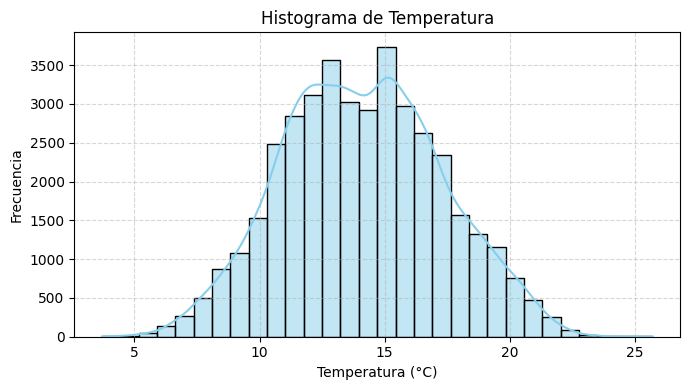

In [12]:
plt.figure(figsize=(7, 4))
sns.histplot(df["Temperatura"], bins=30, kde=True, color='skyblue')
plt.title("Histograma de temperatura")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La temperatura se asemeja a una distribución normal con una ligera asimetría hacia la derecha. El rango de temperaturas va desde los 3,7°C hasta aproximadamente 25,*7°C*, como dijimos anteriormente con el resumen estadístico la mayoría de los valores estan concentrados entre 12°C y 16°C. Esto indica un clima moderado predominante en la estación analizada, sin temperaturas extremas.

Presión QFE

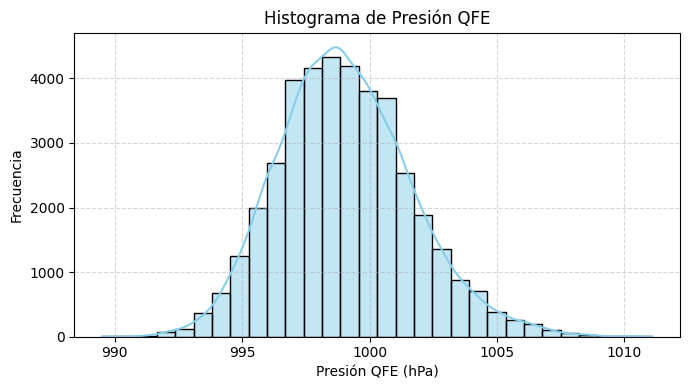

In [13]:
plt.figure(figsize=(7, 4))
sns.histplot(df["Presion_QFE"], bins=30, kde=True, color='skyblue')
plt.title("Histograma de Presión QFE")
plt.xlabel("Presión QFE (hPa)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La presión QFE se concentra fuertemente entre 996 y 1002 hPa, con una leve asimetría negativa hacia la izquierda, Esto sugiere que la presión atmosférica en esta estación suele mantenerse estable, con pequeñas variaciones, lo que puede estar asociado a condiciones meteorológicas relativamente constantes.

Presión QFF

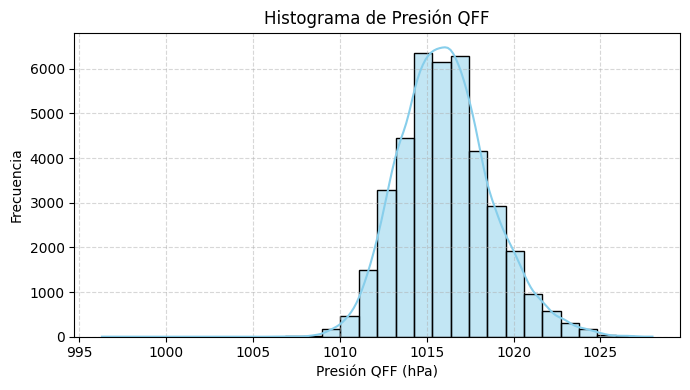

In [14]:
plt.figure(figsize=(7, 4))
sns.histplot(df["Presion_QFF"], bins=30, kde=True, color='skyblue')
plt.title("Histograma de Presión QFF")
plt.xlabel("Presión QFF (hPa)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La presión QFF tiene una distribución un poco mas simétrica que QFE, con un claro peak alrededor de los 1016 hPa, esta variable representa la presión corregida a nivel del mar, por lo que la estabilidad en sus valores refuerza la idea de que esta región no presenta eventos extremos frecuentes a nivel atmosférico.

Velocidad del viento

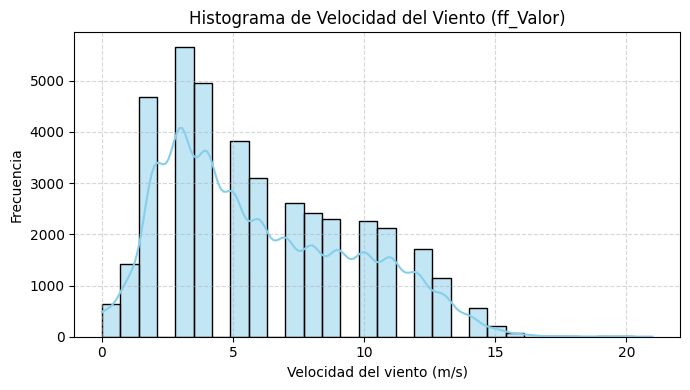

In [15]:
plt.figure(figsize=(7, 4))
sns.histplot(df["ff_Valor"], bins=30, kde=True, color='skyblue')
plt.title("Histograma de Velocidad del Viento (ff_Valor)")
plt.xlabel("Velocidad del viento (m/s)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La mayoría de las observaciones de velocidad del viento se sitúan entre 0 y 10 m/s con una caída rápida a medida que aumenta la velocidad. Hay eventos de hasta 21 m/s pero son poco frecuentes. Esto indica que el viento suele ser moderado *con* algunas ráfagas ocasionales más intensas.

Dirección del viento

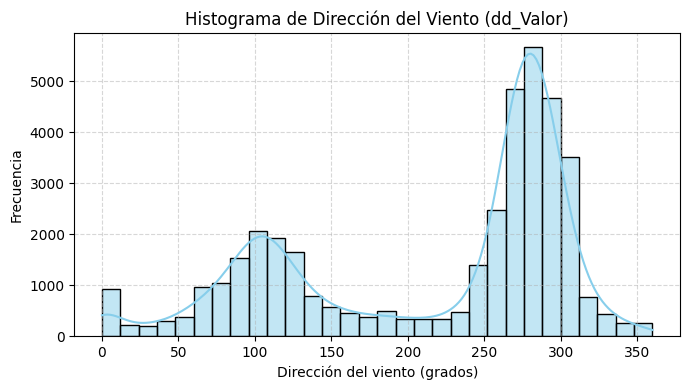

In [16]:
plt.figure(figsize=(7, 4))
sns.histplot(df["dd_Valor"], bins=30, kde=True, color='skyblue')
plt.title("Histograma de Dirección del Viento (dd_Valor)")
plt.xlabel("Dirección del viento (grados)")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La dirección del viento está distribuida entre 0° y 360° aunque muestra mayor frecuencia en el rango entre 200° y 300°, lo que nos indique que los vientos predominantes provienen del suroeste, esto puede relacionarse con características geográficas o patrones climáticos típicos de la zona.

Indicador de dirección de viento indefinida

/tmp/ipython-input-8-2967640553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="VRB_Valor", data=df, palette=["skyblue", "steelblue"])


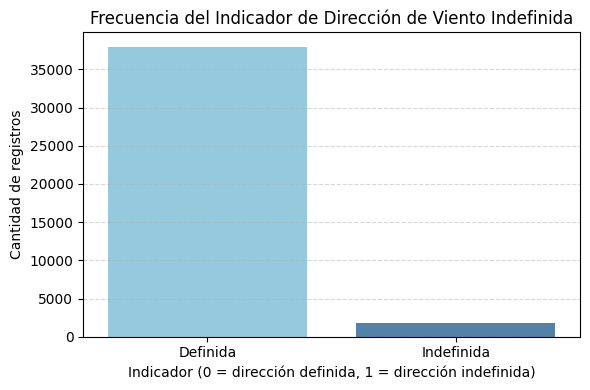

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x="VRB_Valor", data=df, palette=["skyblue", "steelblue"])
plt.title("Frecuencia del Indicador de Dirección de Viento Indefinida")
plt.xlabel("Indicador (0 = dirección definida, 1 = dirección indefinida)")
plt.ylabel("Cantidad de registros")
plt.xticks([0, 1], ["Definida", "Indefinida"])
plt.grid(True, linestyle='--', alpha=0.5, axis='y')
plt.tight_layout()
plt.show()

La gran mayoría de las observaciones tienen un valor de 0, lo que indica que el viento tiene una dirección definida en la mayor parte del tiempo. Solo una fracción muy pequeña de los registros corresponde a 1, es decir, a momentos donde el viento presentaba una dirección indefinida o cambiante.
Este fenómeno puede asociarse a condiciones atmosféricas inestables, turbulencias locales o velocidades de viento muy bajas que impiden detectar una dirección dominante.

### **Análisis Bivariado**

Seguimos con el análisis bivariado, que lo usamos para explorar posibles relaciones o patrones entre pares de variables, permitiendo comprender cómo interactúan entre sí.

Para la estación 290004, se emplearon principalmente gráficos de dispersión temporal, líneas de tendencia y boxplots para observar la evolución y variabilidad de las variables meteorológicas a lo largo del tiempo.

Se evaluaron las relaciones entre presión QFE, presión QFF, velocidad del viento, dirección del viento y su variación temporal, tanto mensual y anual.

Este análisis proporciona evidencia visual de comportamientos estacionales, anomalías climáticas o patrones que podrían ser útiles para modelamientos posteriores.

Distribución de la temperatura por año

/tmp/ipython-input-22-2179569137.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Año", y="Temperatura", palette="coolwarm")


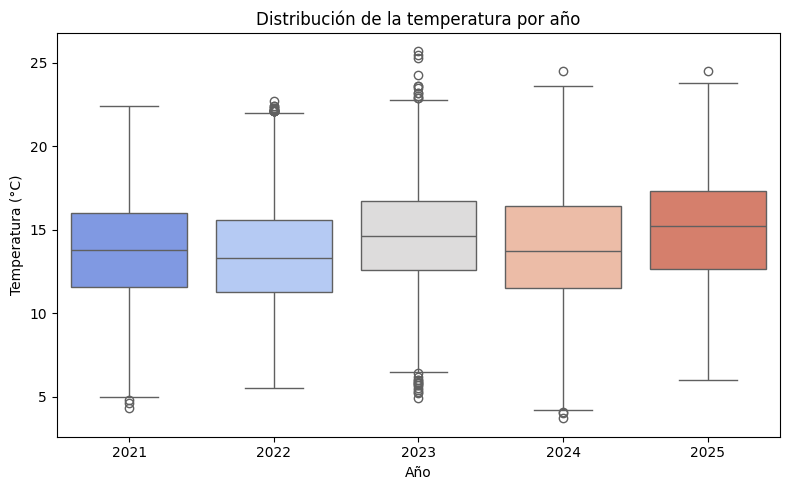

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Año", y="Temperatura", palette="coolwarm")
plt.title("Distribución de la temperatura por año")
plt.xlabel("Año")
plt.ylabel("Temperatura (°C)")
plt.tight_layout()
plt.show()

Hay una leve tendencia creciente en la mediana de la temperatura a lo largo de los años. También se observan valores atípicos que podrían indicar eventos de calor extremo o registros puntuales.

Tendencia mensual de la temperatura

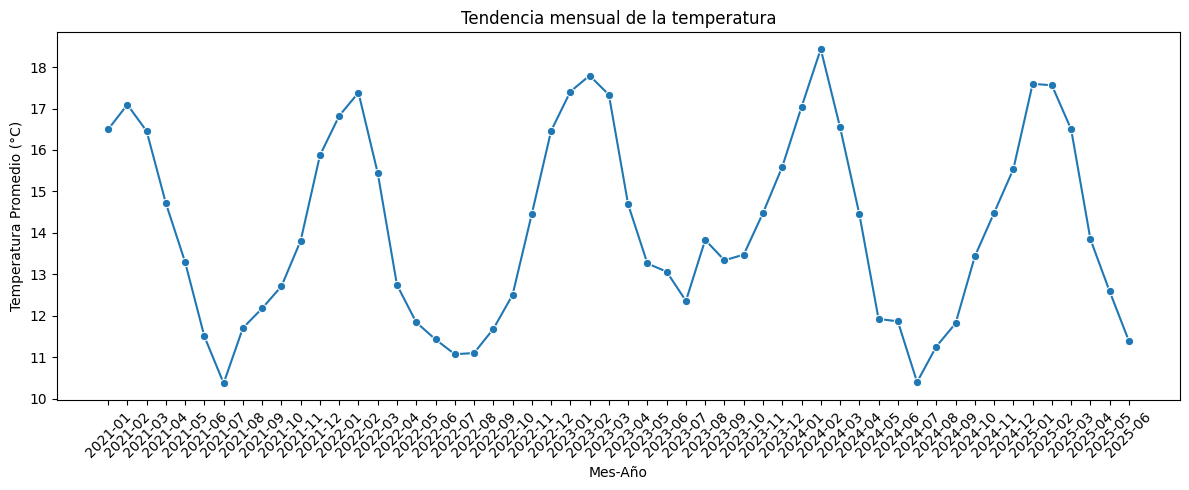

In [23]:
df['Mes-Año'] = df['momento'].dt.to_period("M")
temp_mensual = df.groupby("Mes-Año")["Temperatura"].mean().reset_index()
temp_mensual["Mes-Año"] = temp_mensual["Mes-Año"].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=temp_mensual, x="Mes-Año", y="Temperatura", marker="o")
plt.title("Tendencia mensual de la temperatura")
plt.xlabel("Mes-Año")
plt.ylabel("Temperatura Promedio (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa una variación estacional clara con subidas y bajadas periódicas, lo que refleja ciclos anuales de temperatura. Además, se puede identificar una tendencia ascendente a largo plazo, especialmente en los años más recientes

Distribución de la presión QFE por año

/tmp/ipython-input-21-560955368.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Año", y="Presion_QFE", palette="crest")


<Axes: xlabel='Año', ylabel='Presion_QFE'>

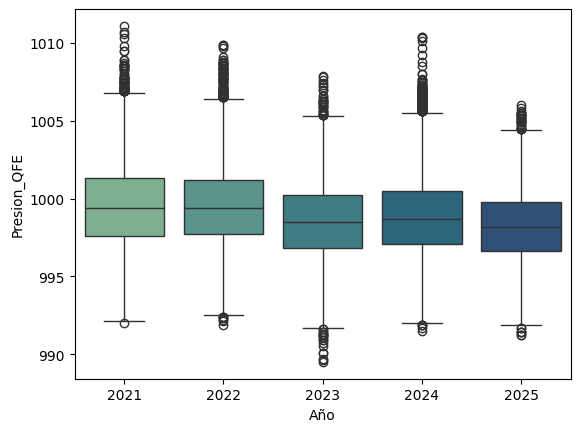

In [21]:
sns.boxplot(data=df, x="Año", y="Presion_QFE", palette="crest")


La presión QFE muestra una distribución relativamente estable a lo largo de los años, con ligeras variaciones en los valores atípicos. No se observan tendencias marcadas, lo que sugiere condiciones barométricas similares entre años.

Tendencia mensual de la presión QFF

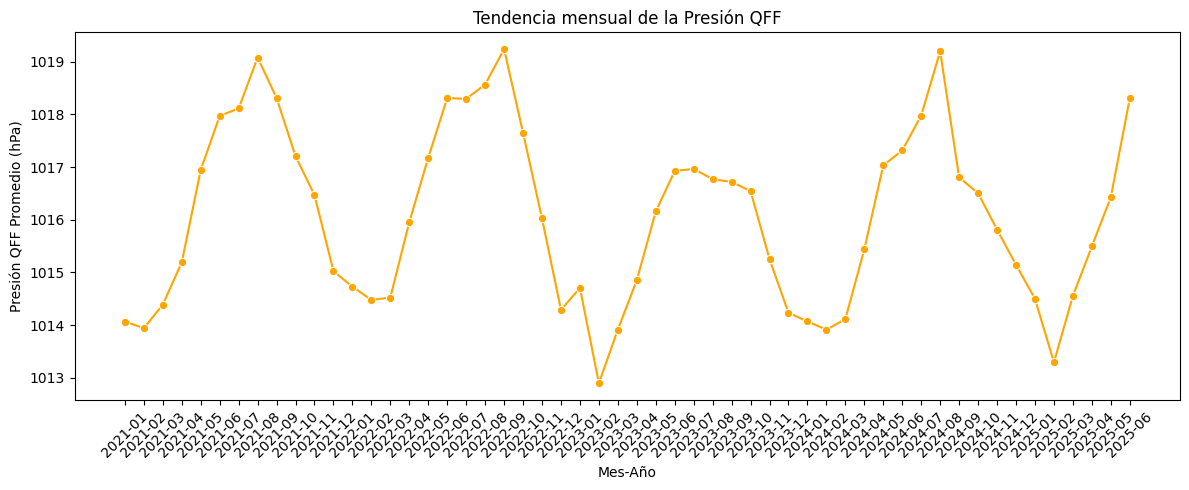

In [25]:
df['Mes-Año'] = df['momento'].dt.to_period("M")
presion_mensual = df.groupby("Mes-Año")["Presion_QFF"].mean().reset_index()
presion_mensual["Mes-Año"] = presion_mensual["Mes-Año"].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=presion_mensual, x="Mes-Año", y="Presion_QFF", marker="o", color="orange")
plt.title("Tendencia mensual de la Presión QFF")
plt.xlabel("Mes-Año")
plt.ylabel("Presión QFF Promedio (hPa)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La presión QFF tiene oscilaciones a lo largo de los meses, pero en general presenta una tendencia estable. Las caídas o alzas puntuales pueden deberse a fenómenos meteorológicos específicos.

Distribución de la velocidad del viento por año

/tmp/ipython-input-26-2667889298.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Año", y="ff_Valor", palette="light:#5A9_r")


<Axes: xlabel='Año', ylabel='ff_Valor'>

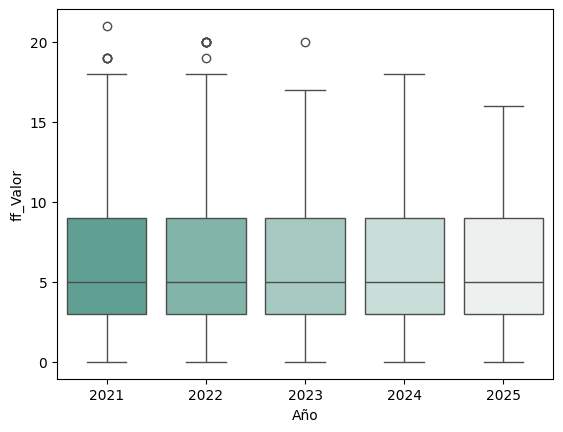

In [26]:
sns.boxplot(data=df, x="Año", y="ff_Valor", palette="light:#5A9_r")

La velocidad del viento tiene una distribución relativamente homogénea entre los años. Se aprecian valores atípicos, especialmente en los primeros años analizados, lo cual puede estar asociado a eventos de viento fuertes o extremos.

Tendencia mensual de la velocidad del viento

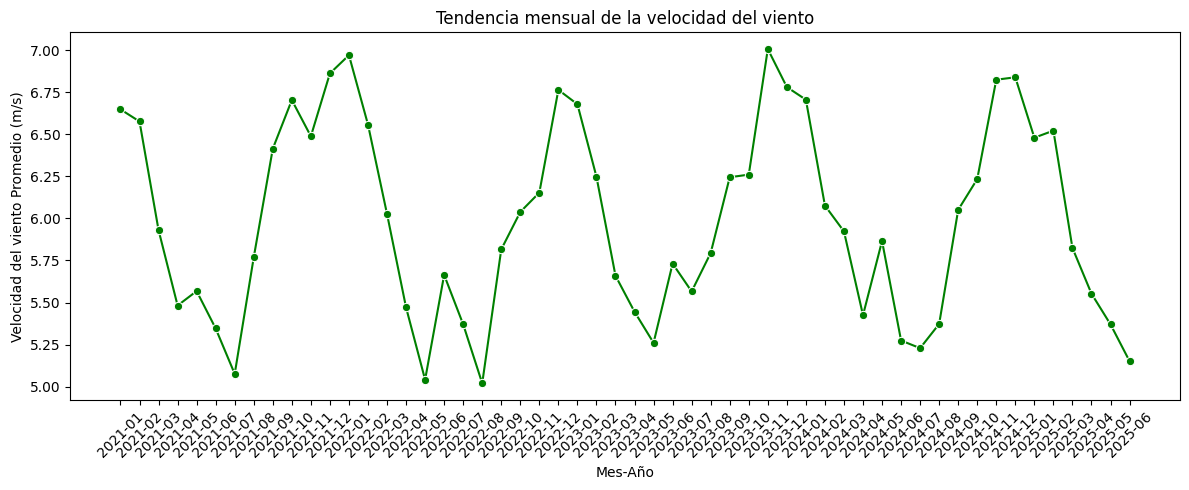

In [28]:
df['Mes-Año'] = df['momento'].dt.to_period("M")
viento_mensual = df.groupby("Mes-Año")["ff_Valor"].mean().reset_index()
viento_mensual["Mes-Año"] = viento_mensual["Mes-Año"].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=viento_mensual, x="Mes-Año", y="ff_Valor", marker="o", color="green")
plt.title("Tendencia mensual de la velocidad del viento")
plt.xlabel("Mes-Año")
plt.ylabel("Velocidad del viento Promedio (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa un patrón estacional en la velocidad del viento que tiende a aumentar en ciertos meses del año, lo que sugiere la influencia de fenómenos climáticos cíclicos.

Distribución de la dirección del viento por año

/tmp/ipython-input-29-2445511604.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Año", y="dd_Valor", palette="flare")


<Axes: xlabel='Año', ylabel='dd_Valor'>

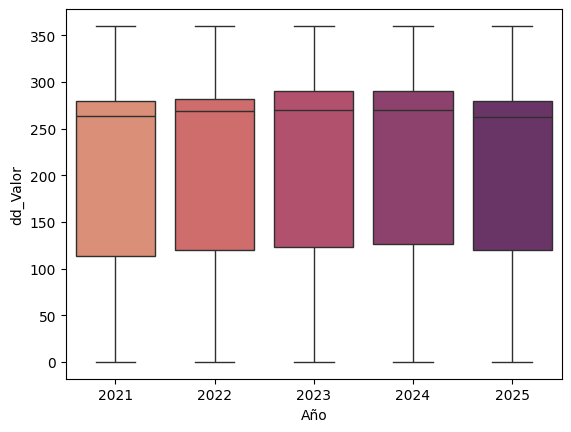

In [29]:
sns.boxplot(data=df, x="Año", y="dd_Valor", palette="flare")

La dirección del viento muestra una gran dispersión durante todos los años, lo cual es esperable ya que el viento puede provenir de cualquier dirección. No se identifica una dirección dominante en este nivel de análisis.

### **Análisis de Correlación**

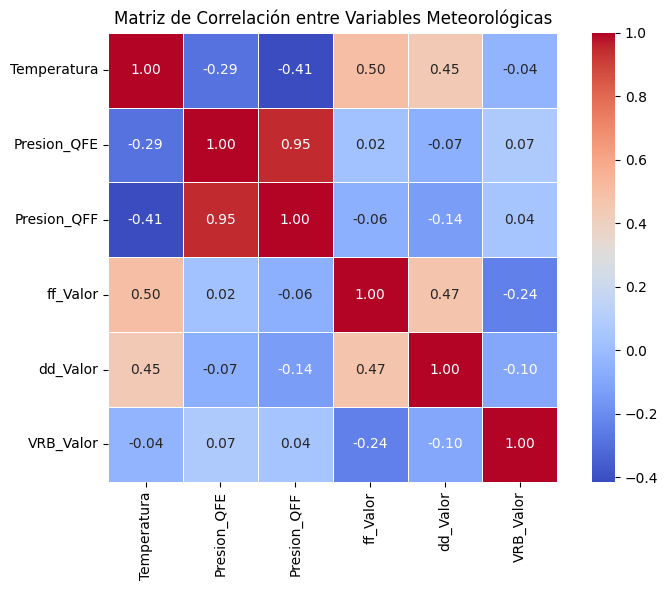

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Temperatura", "Presion_QFE", "Presion_QFF", "ff_Valor", "dd_Valor", "VRB_Valor"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Matriz de Correlación entre Variables Meteorológicas")
plt.tight_layout()
plt.show()

1. Existe una alta correlación positiva entre Presion_QFE y Presion_QFF, lo cual es esperable ya que ambas representan tipos de presión.

2. La temperatura muestra baja correlación con otras variables, lo que sugiere que podría tener un comportamiento más independiente en el modelo.

3. Indicador de dirección de viento indefinida, al ser una variable indicadora binaria, tiene correlaciones muy bajas, como es habitual en variables categóricas binarias.



### **Conclusiones Finales**

El análisis exploratorio sobre los datos de la estación meteorológica 290004 permitió comprender en profundidad la estructura, comportamiento y relaciones de las variables registradas. Con el análisis univariado, se identificaron distribuciones, rangos y posibles outliers para variables como temperatura, presión, dirección y velocidad del viento. En el análisis bivariado, se examinaron relaciones entre pares de variables, así como su evolución temporal, permitiendo detectar estacionalidades y patrones relevantes. Posteriormente, el análisis de correlación entregó evidencia cuantitativa sobre las asociaciones lineales entre las variables. Este paso fue especialmente útil para orientar la selección de variables exógenas en el modelo SARIMAX, descartando aquellas con redundancia o escasa relación con la variable objetivo. También se identificaron combinaciones altamente correlacionadas que podrían simplificarse sin pérdida de información, lo que favorece la eficiencia y estabilidad del modelo.

Este EDA cumple un rol fundamental al sentar las bases para una modelación adecuada, informando decisiones clave como la inclusión de variables exógenas, la detección de estacionalidades y la validación de supuestos lineales. Esto permitirá abordar la construcción del modelo SARIMAX con una comprensión profunda de los datos y sus interrelaciones.